# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from utils import *
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Data

In [2]:
column_names = ['serial', 'date', 'age', 'distance', 'stores', 'latitude', 'longitude', 'price']
data=pd.read_csv('data.csv',names=column_names)
data.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   serial     5000 non-null   int64
 1   date       5000 non-null   int64
 2   age        5000 non-null   int64
 3   distance   5000 non-null   int64
 4   stores     5000 non-null   int64
 5   latitude   5000 non-null   int64
 6   longitude  5000 non-null   int64
 7   price      5000 non-null   int64
dtypes: int64(8)
memory usage: 312.6 KB


# Check Missing Data

In [4]:
data.isna().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

In [5]:
data.mean()

serial        2499.5000
date          2008.9128
age             18.9450
distance         4.9778
stores           4.9150
latitude        84.9714
longitude      124.9942
price        13906.6386
dtype: float64

In [16]:
data.drop('serial',axis=1,inplace=True)

In [17]:
data.corr()

,date,age,distance,stores,latitude,longitude,price
date,1.000000,-0.015108,0.023578,-0.007395,0.001455,-0.001765,0.036171
age,-0.015108,1.000000,-0.010661,0.005447,0.007539,0.022218,0.616318
distance,0.023578,-0.010661,1.000000,0.000270,-0.000854,-0.021364,0.651004
stores,-0.007395,0.005447,0.000270,1.000000,0.005351,0.005737,0.158329
latitude,0.001455,0.007539,-0.000854,0.005351,1.000000,-0.009402,0.010986
longitude,-0.001765,0.022218,-0.021364,0.005737,-0.009402,1.000000,0.020915
price,0.036171,0.616318,0.651004,0.158329,0.010986,0.020915,1.000000


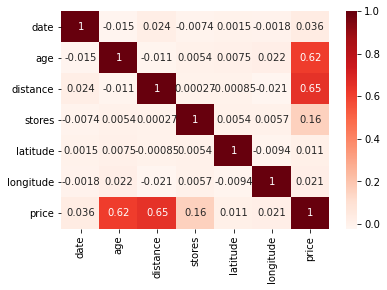

In [20]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='Reds')

# Data Standardization

In [15]:
data.head()

,date,age,distance,stores,latitude,longitude,price
0,2009,21,9,6,84,121,14264
1,2007,4,2,3,86,121,12032
2,2016,18,3,7,90,120,13560
3,2002,13,2,2,80,128,12029
4,2014,25,5,8,81,122,14157


In [18]:
y_mean = data['price'].mean()
y_std = data['price'].std()
data2=data
data2.head()

,date,age,distance,stores,latitude,longitude,price
0,2009,21,9,6,84,121,14264
1,2007,4,2,3,86,121,12032
2,2016,18,3,7,90,120,13560
3,2002,13,2,2,80,128,12029
4,2014,25,5,8,81,122,14157


In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(data2)
data2=scaler.transform(data2)
data2=pd.DataFrame(data2,columns=column_names[1:])
data2.head()

,date,age,distance,stores,latitude,longitude,price
0,0.015979,0.181402,1.257127,0.345258,-0.307242,-1.260925,0.350123
1,-0.350520,-1.319250,-0.930703,-0.609373,0.325334,-1.260925,-1.836670
2,1.298728,-0.083419,-0.618156,0.663469,1.590487,-1.576614,-0.339618
3,-1.266769,-0.524787,-0.930703,-0.927583,-1.572395,0.948898,-1.839609
4,0.932228,0.534497,0.006939,0.981679,-1.256107,-0.945236,0.245291


# To convert final price predictions to Original Scaling

In [78]:
def convert_label_value(pred):
    return int(pred * y_std + y_mean)

# Create Training and Test Set

In [23]:
x=data2.iloc[:,:6]
y=data2.iloc[:,6]

In [24]:
x.head()

,date,age,distance,stores,latitude,longitude
0,0.015979,0.181402,1.257127,0.345258,-0.307242,-1.260925
1,-0.350520,-1.319250,-0.930703,-0.609373,0.325334,-1.260925
2,1.298728,-0.083419,-0.618156,0.663469,1.590487,-1.576614
3,-1.266769,-0.524787,-0.930703,-0.927583,-1.572395,0.948898
4,0.932228,0.534497,0.006939,0.981679,-1.256107,-0.945236


In [25]:
y.head()

0    0.350123
1   -1.836670
2   -0.339618
3   -1.839609
4    0.245291
Name: price, dtype: float64

In [26]:
x_arr=x.values
y_arr=y.values
print(x_arr.shape)
print(y_arr.shape)

(5000, 6)
(5000,)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(x_arr, y_arr, test_size = 0.05, shuffle = True)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (4750, 6)
y_train shape:  (4750,)
X_test shape:  (250, 6)
y_test shape:  (250,)


# Create Model 

In [36]:
def get_model():
    
    model = Sequential([
        Dense(20, input_shape = (6,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)         #no activation as prices range from -3 to +3
    ])

    model.compile(
        loss='mse',
        optimizer='adadelta',
        metrics=[tf.keras.metrics.MeanAbsoluteError()]
    )
    
    return model

model = get_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 20)                140       
_________________________________________________________________
dense_13 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 6         
Total params: 671
Trainable params: 671
Non-trainable params: 0
_________________________________________________________________


# Training Model

In [39]:
early_stopping = EarlyStopping(monitor='val_loss', patience = 5)

history = model.fit(
    X_train, y_train,
    epochs = 1000,
    validation_split=0.05,
    callbacks = [early_stopping]
)

Train on 4512 samples, validate on 238 samples
Epoch 1/1000
4512/4512 [==============================] - 7s 2ms/sample - loss: 1.4326 - mean_absolute_error: 0.9526 - val_loss: 1.4271 - val_mean_absolute_error: 0.9631
Epoch 2/1000
4512/4512 [==============================] - 1s 308us/sample - loss: 1.4276 - mean_absolute_error: 0.9511 - val_loss: 1.4224 - val_mean_absolute_error: 0.9616
Epoch 3/1000
4512/4512 [==============================] - 1s 310us/sample - loss: 1.4226 - mean_absolute_error: 0.9496 - val_loss: 1.4178 - val_mean_absolute_error: 0.9602
Epoch 4/1000
4512/4512 [==============================] - 2s 352us/sample - loss: 1.4177 - mean_absolute_error: 0.9481 - val_loss: 1.4131 - val_mean_absolute_error: 0.9587
Epoch 5/1000
4512/4512 [==============================] - 2s 379us/sample - loss: 1.4127 - mean_absolute_error: 0.9465 - val_loss: 1.4085 - val_mean_absolute_error: 0.9573
Epoch 6/1000
4512/4512 [==============================] - 1s 258us/sample - loss: 1.4077 - mean

4512/4512 [==============================] - 1s 328us/sample - loss: 1.0840 - mean_absolute_error: 0.8368 - val_loss: 1.0970 - val_mean_absolute_error: 0.8525
Epoch 96/1000
4512/4512 [==============================] - 1s 309us/sample - loss: 1.0816 - mean_absolute_error: 0.8359 - val_loss: 1.0945 - val_mean_absolute_error: 0.8517
Epoch 97/1000
4512/4512 [==============================] - 1s 308us/sample - loss: 1.0791 - mean_absolute_error: 0.8349 - val_loss: 1.0921 - val_mean_absolute_error: 0.8508
Epoch 98/1000
4512/4512 [==============================] - 1s 316us/sample - loss: 1.0766 - mean_absolute_error: 0.8340 - val_loss: 1.0896 - val_mean_absolute_error: 0.8499
Epoch 99/1000
4512/4512 [==============================] - 2s 343us/sample - loss: 1.0741 - mean_absolute_error: 0.8330 - val_loss: 1.0872 - val_mean_absolute_error: 0.8490
Epoch 100/1000
4512/4512 [==============================] - 1s 314us/sample - loss: 1.0716 - mean_absolute_error: 0.8321 - val_loss: 1.0847 - val_mea

4512/4512 [==============================] - 1s 233us/sample - loss: 0.9000 - mean_absolute_error: 0.7616 - val_loss: 0.9143 - val_mean_absolute_error: 0.7817
Epoch 190/1000
4512/4512 [==============================] - 1s 232us/sample - loss: 0.8985 - mean_absolute_error: 0.7609 - val_loss: 0.9128 - val_mean_absolute_error: 0.7811
Epoch 191/1000
4512/4512 [==============================] - 1s 225us/sample - loss: 0.8969 - mean_absolute_error: 0.7602 - val_loss: 0.9112 - val_mean_absolute_error: 0.7804
Epoch 192/1000
4512/4512 [==============================] - 1s 226us/sample - loss: 0.8954 - mean_absolute_error: 0.7595 - val_loss: 0.9097 - val_mean_absolute_error: 0.7798
Epoch 193/1000
4512/4512 [==============================] - 1s 236us/sample - loss: 0.8938 - mean_absolute_error: 0.7588 - val_loss: 0.9081 - val_mean_absolute_error: 0.7791
Epoch 194/1000
4512/4512 [==============================] - 1s 240us/sample - loss: 0.8923 - mean_absolute_error: 0.7581 - val_loss: 0.9066 - val

4512/4512 [==============================] - 1s 231us/sample - loss: 0.7717 - mean_absolute_error: 0.7010 - val_loss: 0.7820 - val_mean_absolute_error: 0.7225
Epoch 284/1000
4512/4512 [==============================] - 1s 233us/sample - loss: 0.7705 - mean_absolute_error: 0.7004 - val_loss: 0.7807 - val_mean_absolute_error: 0.7219
Epoch 285/1000
4512/4512 [==============================] - 1s 235us/sample - loss: 0.7693 - mean_absolute_error: 0.6998 - val_loss: 0.7795 - val_mean_absolute_error: 0.7213
Epoch 286/1000
4512/4512 [==============================] - 1s 232us/sample - loss: 0.7681 - mean_absolute_error: 0.6992 - val_loss: 0.7783 - val_mean_absolute_error: 0.7207
Epoch 287/1000
4512/4512 [==============================] - 1s 233us/sample - loss: 0.7669 - mean_absolute_error: 0.6986 - val_loss: 0.7770 - val_mean_absolute_error: 0.7201
Epoch 288/1000
4512/4512 [==============================] - 1s 228us/sample - loss: 0.7657 - mean_absolute_error: 0.6980 - val_loss: 0.7758 - val

4512/4512 [==============================] - 1s 224us/sample - loss: 0.6677 - mean_absolute_error: 0.6466 - val_loss: 0.6715 - val_mean_absolute_error: 0.6679
Epoch 378/1000
4512/4512 [==============================] - 1s 271us/sample - loss: 0.6666 - mean_absolute_error: 0.6461 - val_loss: 0.6704 - val_mean_absolute_error: 0.6674
Epoch 379/1000
4512/4512 [==============================] - 1s 290us/sample - loss: 0.6656 - mean_absolute_error: 0.6455 - val_loss: 0.6693 - val_mean_absolute_error: 0.6669
Epoch 380/1000
4512/4512 [==============================] - 1s 292us/sample - loss: 0.6646 - mean_absolute_error: 0.6449 - val_loss: 0.6682 - val_mean_absolute_error: 0.6663
Epoch 381/1000
4512/4512 [==============================] - 1s 300us/sample - loss: 0.6636 - mean_absolute_error: 0.6444 - val_loss: 0.6672 - val_mean_absolute_error: 0.6658
Epoch 382/1000
4512/4512 [==============================] - 1s 292us/sample - loss: 0.6626 - mean_absolute_error: 0.6438 - val_loss: 0.6661 - val

Epoch 424/1000
4512/4512 [==============================] - 1s 222us/sample - loss: 0.6211 - mean_absolute_error: 0.6210 - val_loss: 0.6223 - val_mean_absolute_error: 0.6425
Epoch 425/1000
4512/4512 [==============================] - 1s 221us/sample - loss: 0.6201 - mean_absolute_error: 0.6205 - val_loss: 0.6213 - val_mean_absolute_error: 0.6419
Epoch 426/1000
4512/4512 [==============================] - 1s 223us/sample - loss: 0.6191 - mean_absolute_error: 0.6199 - val_loss: 0.6203 - val_mean_absolute_error: 0.6414
Epoch 427/1000
4512/4512 [==============================] - 1s 221us/sample - loss: 0.6182 - mean_absolute_error: 0.6194 - val_loss: 0.6193 - val_mean_absolute_error: 0.6408
Epoch 428/1000
4512/4512 [==============================] - 1s 221us/sample - loss: 0.6172 - mean_absolute_error: 0.6189 - val_loss: 0.6183 - val_mean_absolute_error: 0.6403
Epoch 429/1000
4512/4512 [==============================] - 1s 222us/sample - loss: 0.6162 - mean_absolute_error: 0.6183 - val_los

4512/4512 [==============================] - 1s 228us/sample - loss: 0.5771 - mean_absolute_error: 0.5965 - val_loss: 0.5773 - val_mean_absolute_error: 0.6176
Epoch 472/1000
4512/4512 [==============================] - 1s 231us/sample - loss: 0.5762 - mean_absolute_error: 0.5960 - val_loss: 0.5764 - val_mean_absolute_error: 0.6171
Epoch 473/1000
4512/4512 [==============================] - 1s 226us/sample - loss: 0.5753 - mean_absolute_error: 0.5955 - val_loss: 0.5755 - val_mean_absolute_error: 0.6166
Epoch 474/1000
4512/4512 [==============================] - 1s 232us/sample - loss: 0.5744 - mean_absolute_error: 0.5950 - val_loss: 0.5746 - val_mean_absolute_error: 0.6161
Epoch 475/1000
4512/4512 [==============================] - 1s 231us/sample - loss: 0.5735 - mean_absolute_error: 0.5945 - val_loss: 0.5737 - val_mean_absolute_error: 0.6155
Epoch 476/1000
4512/4512 [==============================] - 1s 229us/sample - loss: 0.5726 - mean_absolute_error: 0.5940 - val_loss: 0.5728 - val

4512/4512 [==============================] - 1s 230us/sample - loss: 0.4989 - mean_absolute_error: 0.5527 - val_loss: 0.4989 - val_mean_absolute_error: 0.5717
Epoch 566/1000
4512/4512 [==============================] - 1s 307us/sample - loss: 0.4982 - mean_absolute_error: 0.5523 - val_loss: 0.4982 - val_mean_absolute_error: 0.5712
Epoch 567/1000
4512/4512 [==============================] - 1s 324us/sample - loss: 0.4974 - mean_absolute_error: 0.5519 - val_loss: 0.4975 - val_mean_absolute_error: 0.5707
Epoch 568/1000
4512/4512 [==============================] - 2s 384us/sample - loss: 0.4967 - mean_absolute_error: 0.5514 - val_loss: 0.4967 - val_mean_absolute_error: 0.5703
Epoch 569/1000
4512/4512 [==============================] - 2s 408us/sample - loss: 0.4959 - mean_absolute_error: 0.5510 - val_loss: 0.4960 - val_mean_absolute_error: 0.5698
Epoch 570/1000
4512/4512 [==============================] - 2s 357us/sample - loss: 0.4951 - mean_absolute_error: 0.5506 - val_loss: 0.4952 - val

Epoch 659/1000
4512/4512 [==============================] - 1s 269us/sample - loss: 0.4320 - mean_absolute_error: 0.5149 - val_loss: 0.4331 - val_mean_absolute_error: 0.5291
Epoch 660/1000
4512/4512 [==============================] - 1s 274us/sample - loss: 0.4314 - mean_absolute_error: 0.5146 - val_loss: 0.4325 - val_mean_absolute_error: 0.5287
Epoch 661/1000
4512/4512 [==============================] - 1s 271us/sample - loss: 0.4307 - mean_absolute_error: 0.5142 - val_loss: 0.4319 - val_mean_absolute_error: 0.5283
Epoch 662/1000
4512/4512 [==============================] - 1s 271us/sample - loss: 0.4301 - mean_absolute_error: 0.5138 - val_loss: 0.4312 - val_mean_absolute_error: 0.5279
Epoch 663/1000
4512/4512 [==============================] - 1s 298us/sample - loss: 0.4294 - mean_absolute_error: 0.5134 - val_loss: 0.4306 - val_mean_absolute_error: 0.5275
Epoch 664/1000
4512/4512 [==============================] - 1s 319us/sample - loss: 0.4288 - mean_absolute_error: 0.5131 - val_los

4512/4512 [==============================] - 1s 269us/sample - loss: 0.4022 - mean_absolute_error: 0.4979 - val_loss: 0.4044 - val_mean_absolute_error: 0.5108
Epoch 707/1000
4512/4512 [==============================] - 1s 316us/sample - loss: 0.4016 - mean_absolute_error: 0.4976 - val_loss: 0.4038 - val_mean_absolute_error: 0.5104
Epoch 708/1000
4512/4512 [==============================] - 1s 283us/sample - loss: 0.4010 - mean_absolute_error: 0.4972 - val_loss: 0.4032 - val_mean_absolute_error: 0.5100
Epoch 709/1000
4512/4512 [==============================] - 1s 312us/sample - loss: 0.4004 - mean_absolute_error: 0.4969 - val_loss: 0.4026 - val_mean_absolute_error: 0.5096
Epoch 710/1000
4512/4512 [==============================] - 1s 309us/sample - loss: 0.3998 - mean_absolute_error: 0.4965 - val_loss: 0.4020 - val_mean_absolute_error: 0.5093
Epoch 711/1000
4512/4512 [==============================] - 1s 317us/sample - loss: 0.3991 - mean_absolute_error: 0.4962 - val_loss: 0.4014 - val

Epoch 753/1000
4512/4512 [==============================] - 1s 313us/sample - loss: 0.3744 - mean_absolute_error: 0.4816 - val_loss: 0.3774 - val_mean_absolute_error: 0.4928
Epoch 754/1000
4512/4512 [==============================] - 1s 322us/sample - loss: 0.3738 - mean_absolute_error: 0.4812 - val_loss: 0.3768 - val_mean_absolute_error: 0.4924
Epoch 755/1000
4512/4512 [==============================] - 1s 324us/sample - loss: 0.3733 - mean_absolute_error: 0.4809 - val_loss: 0.3763 - val_mean_absolute_error: 0.4920
Epoch 756/1000
4512/4512 [==============================] - 1s 326us/sample - loss: 0.3727 - mean_absolute_error: 0.4806 - val_loss: 0.3757 - val_mean_absolute_error: 0.4917
Epoch 757/1000
4512/4512 [==============================] - 1s 265us/sample - loss: 0.3721 - mean_absolute_error: 0.4802 - val_loss: 0.3752 - val_mean_absolute_error: 0.4913
Epoch 758/1000
4512/4512 [==============================] - 1s 301us/sample - loss: 0.3716 - mean_absolute_error: 0.4799 - val_los

4512/4512 [==============================] - 1s 227us/sample - loss: 0.3490 - mean_absolute_error: 0.4666 - val_loss: 0.3531 - val_mean_absolute_error: 0.4772
Epoch 801/1000
4512/4512 [==============================] - 1s 318us/sample - loss: 0.3485 - mean_absolute_error: 0.4663 - val_loss: 0.3526 - val_mean_absolute_error: 0.4768
Epoch 802/1000
4512/4512 [==============================] - 1s 309us/sample - loss: 0.3480 - mean_absolute_error: 0.4660 - val_loss: 0.3521 - val_mean_absolute_error: 0.4765
Epoch 803/1000
4512/4512 [==============================] - 1s 299us/sample - loss: 0.3475 - mean_absolute_error: 0.4657 - val_loss: 0.3516 - val_mean_absolute_error: 0.4762
Epoch 804/1000
4512/4512 [==============================] - 1s 271us/sample - loss: 0.3470 - mean_absolute_error: 0.4654 - val_loss: 0.3511 - val_mean_absolute_error: 0.4759
Epoch 805/1000
4512/4512 [==============================] - 1s 325us/sample - loss: 0.3465 - mean_absolute_error: 0.4651 - val_loss: 0.3506 - val

4512/4512 [==============================] - 1s 307us/sample - loss: 0.3047 - mean_absolute_error: 0.4399 - val_loss: 0.3110 - val_mean_absolute_error: 0.4517
Epoch 895/1000
4512/4512 [==============================] - 1s 320us/sample - loss: 0.3043 - mean_absolute_error: 0.4397 - val_loss: 0.3106 - val_mean_absolute_error: 0.4515
Epoch 896/1000
4512/4512 [==============================] - 2s 337us/sample - loss: 0.3039 - mean_absolute_error: 0.4394 - val_loss: 0.3102 - val_mean_absolute_error: 0.4513
Epoch 897/1000
4512/4512 [==============================] - 2s 349us/sample - loss: 0.3035 - mean_absolute_error: 0.4391 - val_loss: 0.3099 - val_mean_absolute_error: 0.4511
Epoch 898/1000
4512/4512 [==============================] - 2s 340us/sample - loss: 0.3030 - mean_absolute_error: 0.4389 - val_loss: 0.3095 - val_mean_absolute_error: 0.4509
Epoch 899/1000
4512/4512 [==============================] - 1s 317us/sample - loss: 0.3026 - mean_absolute_error: 0.4386 - val_loss: 0.3091 - val

4512/4512 [==============================] - 1s 309us/sample - loss: 0.2685 - mean_absolute_error: 0.4165 - val_loss: 0.2760 - val_mean_absolute_error: 0.4326
Epoch 989/1000
4512/4512 [==============================] - 1s 321us/sample - loss: 0.2681 - mean_absolute_error: 0.4163 - val_loss: 0.2757 - val_mean_absolute_error: 0.4324
Epoch 990/1000
4512/4512 [==============================] - 1s 301us/sample - loss: 0.2678 - mean_absolute_error: 0.4160 - val_loss: 0.2754 - val_mean_absolute_error: 0.4323
Epoch 991/1000
4512/4512 [==============================] - 1s 320us/sample - loss: 0.2674 - mean_absolute_error: 0.4158 - val_loss: 0.2751 - val_mean_absolute_error: 0.4321
Epoch 992/1000
4512/4512 [==============================] - 1s 327us/sample - loss: 0.2671 - mean_absolute_error: 0.4156 - val_loss: 0.2748 - val_mean_absolute_error: 0.4319
Epoch 993/1000
4512/4512 [==============================] - 2s 336us/sample - loss: 0.2668 - mean_absolute_error: 0.4154 - val_loss: 0.2745 - val

# Validation and Training Loss

In [42]:
val_loss=history.history['val_loss']
loss=history.history['loss']
val_mae=history.history['val_mean_absolute_error']
mae=history.history['mean_absolute_error']

Text(0.5, 1.0, 'Validation and Training Loss')

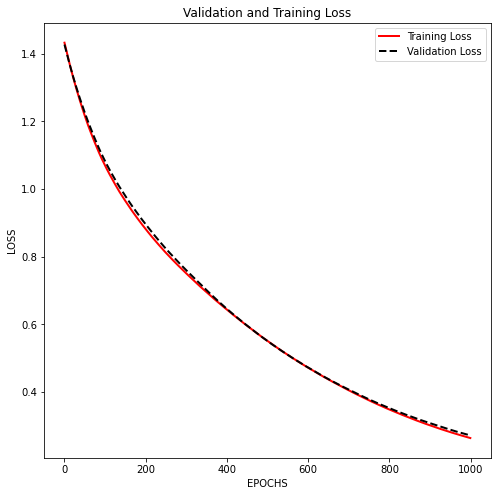

In [71]:
plt.figure(figsize=(8, 8))
plt.plot(range(1000),loss,label='Training Loss',linewidth=2.0,color='red')
plt.plot(range(1000),val_loss,label='Validation Loss',ls='--',linewidth=2.0,color='black')
plt.legend()
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.title("Validation and Training Loss")

Text(0.5, 1.0, 'Validation and Training Loss for last 300 Epochs')

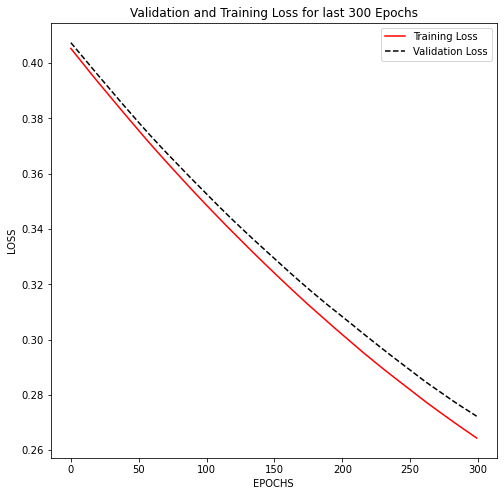

In [68]:
plt.figure(figsize=(8, 8))
plt.plot(range(300),loss[700:1000],label='Training Loss',color='red')
plt.plot(range(300),val_loss[700:1000],label='Validation Loss',ls='--',color='black')
plt.legend()
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.title("Validation and Training Loss for last 300 Epochs")

# Mean Absolute Error For Training and Validation

Text(0.5, 1.0, 'Mean Absolute Error For Training and Validation')

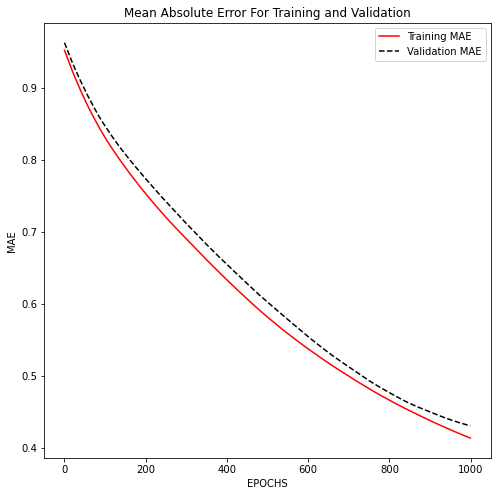

In [69]:
plt.figure(figsize=(8, 8))
plt.plot(range(1000),mae,label='Training MAE',color='red')
plt.plot(range(1000),val_mae,label='Validation MAE',ls='--',color='black')
plt.legend()
plt.xlabel('EPOCHS')
plt.ylabel('MAE')
plt.title("Mean Absolute Error For Training and Validation")

Text(0.5, 1.0, 'Mean Absolute Error For Training and Validation for last 300 epochs')

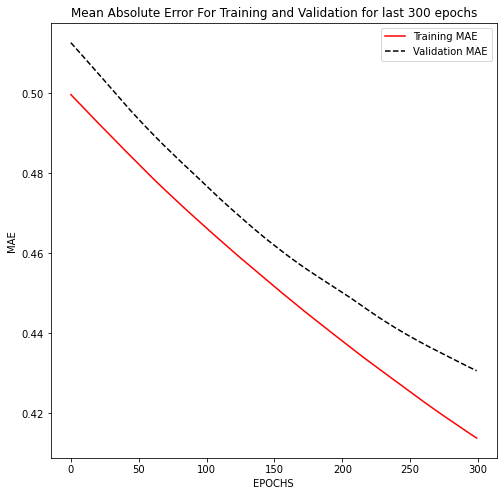

In [72]:
plt.figure(figsize=(8, 8))
plt.plot(range(300),mae[700:1000],label='Training MAE',color='red')
plt.plot(range(300),val_mae[700:1000],label='Validation MAE',ls='--',color='black')
plt.legend()
plt.xlabel('EPOCHS')
plt.ylabel('MAE')
plt.title("Mean Absolute Error For Training and Validation for last 300 epochs")

In [74]:
predictions=model.predict(X_test)

In [79]:
convt_predictions=[convert_label_value(x) for x in predictions]

In [82]:
convt_y_test=[convert_label_value(x) for x in y_test]

Text(0, 0.5, 'Prices')

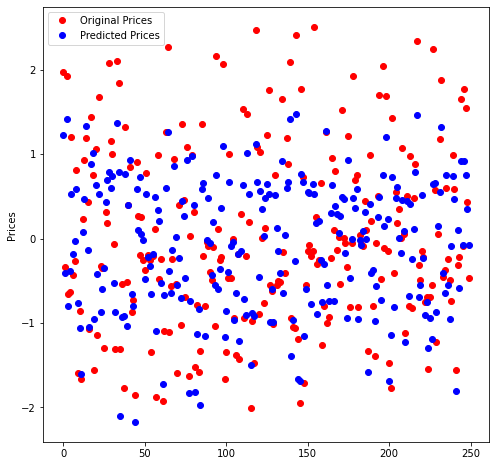

In [109]:
plt.figure(figsize=(8,8))
plt.plot(range(250),y_test,'ro',label='Original Prices')
plt.plot(range(250),predictions,'bo',label='Predicted Prices')
plt.legend()
plt.ylabel("Prices")

In [91]:
h=model.evaluate(X_test,y_test)

250/250 [==============================] - 0s 1ms/sample - loss: 0.3007 - mean_absolute_error: 0.4360


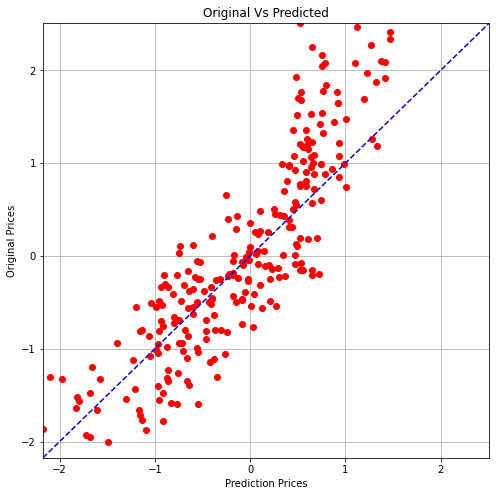

In [118]:
plt.figure(figsize=(8,8))
plt.plot(predictions,y_test,'ro',label='Trained Model')
plt.xlabel('Prediction Prices')
plt.ylabel('Original Prices')
plt.grid()
plt.title('Original Vs Predicted')

y_min = min(min(y_test), min(predictions))
y_max = max(max(y_test), max(predictions))

plt.xlim([y_min, y_max])
plt.ylim([y_min, y_max])
plt.plot([y_min, y_max], [y_min, y_max], 'b--')

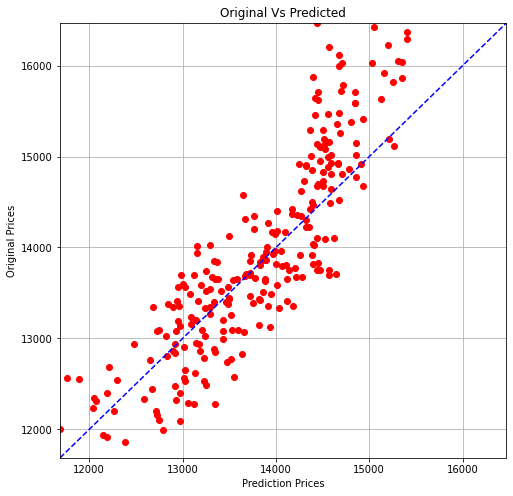

In [119]:
plt.figure(figsize=(8,8))
plt.plot(convt_predictions,convt_y_test,'ro',label='Trained Model')
plt.xlabel('Prediction Prices')
plt.ylabel('Original Prices')
plt.grid()
plt.title('Original Vs Predicted')

y_min = min(min(convt_y_test), min(convt_predictions))
y_max = max(max(convt_y_test), max(convt_predictions))

plt.xlim([y_min, y_max])
plt.ylim([y_min, y_max])
plt.plot([y_min, y_max], [y_min, y_max], 'b--')